<a href="https://colab.research.google.com/github/LeonelCS5/CSCI166-Project/blob/main/166_Project_Q_Learning_Taxi_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gymnasium numpy

In [ ]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode="ansi")


In [ ]:
# Initialize Q-table with zeros
state_space_size = env.observation_space.n  # Total number of states
action_space_size = env.action_space.n  # Total number of actions
q_table = np.zeros((state_space_size, action_space_size))


In [ ]:
learning_rate = 0.1      # How much new information overrides the old
discount_factor = 0.9    # How much we prioritize future rewards over immediate rewards
epsilon = 1.0            # Starting exploration rate
epsilon_decay = 0.995    # Decay rate for exploration
epsilon_min = 0.001
num_episodes = 5000
max_steps_per_episode = 100


In [ ]:
# Diagnostic data
episode_rewards = [] # List to store total rewards per episode
episode_lengths = []
illegal_actions = 0
action_counts = np.zeros(action_space_size)


In [ ]:
# Training the agent
for episode in range(num_episodes):
    state, _ = env.reset()  # Reset environment to get the initial state
    done = False
    total_reward = 0

    steps = 0 ###

    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        if np.random.rand() < epsilon:
            action = env.action_space.sample()  # Explore: random action
        else:
            action = np.argmax(q_table[state])  # Exploit: best known action

        # Take the action, observe the result
        next_state, reward, done, truncated, _ = env.step(action)

        # Update Q-value for the current state-action pair
        q_table[state, action] += learning_rate * (reward + discount_factor * np.max(q_table[next_state]) - q_table[state, action])

        state = next_state  # Update the state
        total_reward += reward

        action_counts[action] += 1
        steps += 1 ###

        if done:  # Stop if the episode ends
            episode_rewards.append(total_reward) ###
            episode_lengths.append(steps) ###
            break

    # Decay epsilon (exploration rate)
    if epsilon > epsilon_min:
        epsilon *= epsilon_decay

    # Print progress
    if (episode + 1) % 100 == 0:
        print(f"Episode {episode + 1}: Total Reward: {total_reward}")

print("Training complete!")
print("Final Q-table values:")
print(q_table)
print("Action counts: ", action_counts)


Episode 100: Total Reward: -271
Episode 200: Total Reward: -235
Episode 300: Total Reward: 8
Episode 400: Total Reward: -41
Episode 500: Total Reward: -118
Episode 600: Total Reward: -67
Episode 700: Total Reward: -7
Episode 800: Total Reward: -54
Episode 900: Total Reward: -14
Episode 1000: Total Reward: -74
Episode 1100: Total Reward: 9
Episode 1200: Total Reward: -13
Episode 1300: Total Reward: -24
Episode 1400: Total Reward: -20
Episode 1500: Total Reward: 7
Episode 1600: Total Reward: -16
Episode 1700: Total Reward: 12
Episode 1800: Total Reward: 10
Episode 1900: Total Reward: 12
Episode 2000: Total Reward: 9
Episode 2100: Total Reward: -3
Episode 2200: Total Reward: 7
Episode 2300: Total Reward: 1
Episode 2400: Total Reward: -2
Episode 2500: Total Reward: 5
Episode 2600: Total Reward: 6
Episode 2700: Total Reward: 5
Episode 2800: Total Reward: 9
Episode 2900: Total Reward: 8
Episode 3000: Total Reward: 4
Episode 3100: Total Reward: 14
Episode 3200: Total Reward: 6
Episode 3300: T

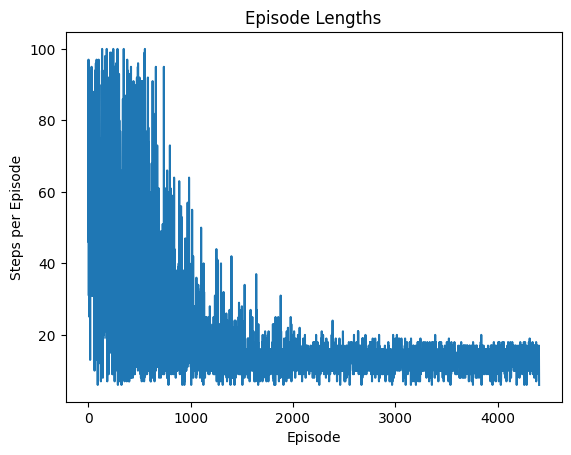

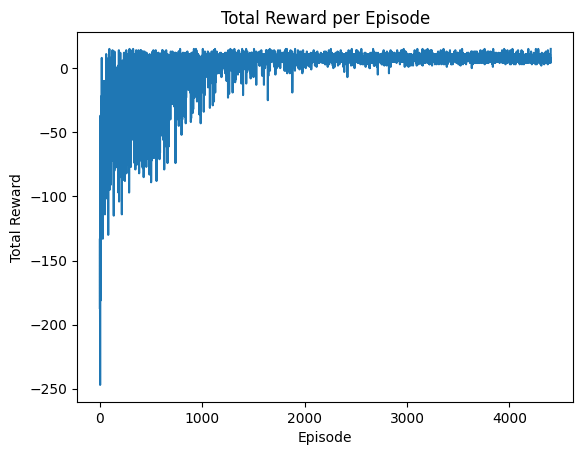

In [ ]:
# Plotting the episode lengths
plt.plot(episode_lengths)
plt.xlabel('Episode')
plt.ylabel('Steps per Episode')
plt.title('Episode Lengths')
plt.show()
print()
# Plotting the total reward per episode
plt.plot(episode_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()


In [ ]:
# Test the trained agent
state, _ = env.reset()
done = False
total_reward = 0

print(f"Action: {action}, Reward: {reward}, Total Reward: {total_reward}")
print(env.render())

while not done:
    action = np.argmax(q_table[state])  # Choose the best action based on Q-table
    state, reward, done, truncated, _ = env.step(action)
    total_reward += reward
    env.render()  # Render the environment
    print(f"Action: {action}, Reward: {reward}, Total Reward: {total_reward}")
    print(env.render())

print(f"Total Reward during test: {total_reward}")


Action: 5, Reward: 20, Total Reward: 0
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Action: 3, Reward: -1, Total Reward: -1
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Action: 0, Reward: -1, Total Reward: -2
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Action: 4, Reward: -1, Total Reward: -3
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Action: 1, Reward: -1, Total Reward: -4
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : |_: |
|Y| : |B: |
+---------+
  (North)

Action: 1, Reward: -1, Total Reward: -5
+---------+
|R: | : :G|
| : | : : |
| : : :_: |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Action: 3, Reward: -1, Total Reward: -6
+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Action: 3, Reward: -1, Total Reward: -7
+---------+
|R: | : :G|
| 